In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import matplotlib.patches as patches

import matplotlib.pyplot as plt
%matplotlib inline

##讀入照片
image=cv2.imread('/content/drive/MyDrive/Colab Notebooks/馬拉松/D24/Dog.JPG')

##因為CV2會將照片讀成BGR，要轉回來
image=image[:,:,::-1]

## 先設BBOX格式為[X,Y,W,H]
## 也就是左上角那一點的座標以及BBOX的寬和高

In [ ]:
Ground_Truth_BBOX=[1900,700,1800,1800]
Prediction_BBOX=[1800,800,1500,1500]

## 轉換成 [X0,Y0,X1,Y1]

In [ ]:
Ground_Truth_BBOX_Transform=[Ground_Truth_BBOX[0],Ground_Truth_BBOX[1],Ground_Truth_BBOX[0]+Ground_Truth_BBOX[2],Ground_Truth_BBOX[1]+Ground_Truth_BBOX[3]]
Prediction_BBOX_Transform=[Prediction_BBOX[0],Prediction_BBOX[1],Prediction_BBOX[0]+Prediction_BBOX[2],Prediction_BBOX[1]+Prediction_BBOX[3]]

In [16]:
print('Ground_Truth_BBOX_Transform:',Ground_Truth_BBOX_Transform)
print('Prediction_BBOX_Transform:',Prediction_BBOX_Transform)

Ground_Truth_BBOX_Transform: [1900, 700, 3700, 2500]
Prediction_BBOX_Transform: [1800, 800, 3300, 2300]


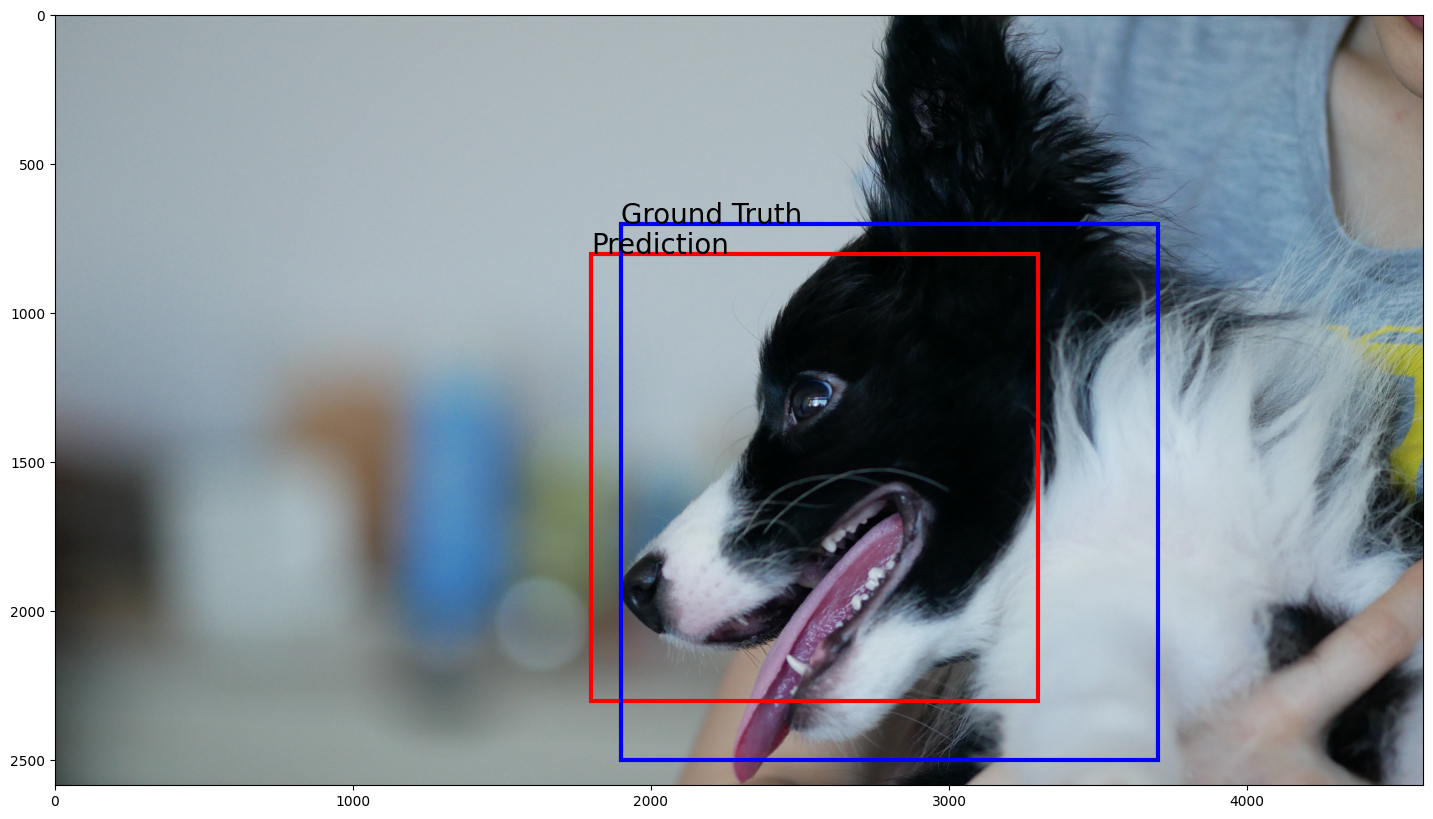

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)


fig,ax = plt.subplots(1)

##畫出圖片
ax.imshow(image)

# 畫BBOX-Prediction
rect = patches.Rectangle((Prediction_BBOX[0],Prediction_BBOX[1]),Prediction_BBOX[2],Prediction_BBOX[3],linewidth=3,edgecolor='r',facecolor='none',)
ax.text(1800,800,'Prediction',size=20)
# 畫BBOX-Ground_Truth
rect_1 = patches.Rectangle((Ground_Truth_BBOX[0],Ground_Truth_BBOX[1]),Ground_Truth_BBOX[2],Ground_Truth_BBOX[3],linewidth=3,edgecolor='b',facecolor='none')
ax.text(1900,700,'Ground Truth',size=20)

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect_1)



plt.show()

## 定義IOU計算

In [18]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(Ground_Truth_BBOX[0], Prediction_BBOX[0])
    yA = max(Ground_Truth_BBOX[1], Prediction_BBOX[1])
    xB = min(Ground_Truth_BBOX[0]+Ground_Truth_BBOX[2], Prediction_BBOX[0]+Prediction_BBOX[2])
    yB = min(Ground_Truth_BBOX[1]+Ground_Truth_BBOX[3], Prediction_BBOX[1]+Prediction_BBOX[3])

    ## 計算交集區域
    interArea = (xB - xA ) * (yB - yA)

    ## 計算各自的BBOX大小
    boxAArea = (boxA[2]-boxA[0]) * (boxA[3]-boxA[1])
    boxBArea = (boxB[2]-boxB[0]) * (boxB[3]-boxB[1])
    # boxAArea = (boxA[] - boxA[1] + 1) * (boxA[''] - boxA[''] + 1)
        # boxBArea = (boxB[''] - boxB[''] + 1) * (boxB[''] - boxB[''] + 1)


    ## 計算IOU
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou

In [19]:
IOU=bb_intersection_over_union(Ground_Truth_BBOX_Transform, Prediction_BBOX_Transform)

In [20]:
print('IOU值：',IOU) #'''應該要得到0.6196482836879266'''

IOU值： 0.6194690265486725
